# Dix Hospital Ledger data cleaning and basic descriptives

This datalab notebook describes the process of cleaning the Dix Intake Ledger, from Raleigh, North Carolina.<br>
The code was written in Stata MP v16.

# Import

In [108]:
//	Import data, recevied 16-Sep-2019 from Sarah Almond

	import delimited "Dix Ledger Deidentified.csv", clear

	describe, f


(29 vars, 7,479 obs)


Contains data
  obs:         7,479                          
 vars:            29                          
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
patientid       int     %8.0g                 Patient ID
patientnumberext
                str1    %9s                   Patient Number Ext
locatedin       int     %8.0g                 Located In
occupationastranscribed
                str39   %39s      

# Univariate formatting

## Age

In [109]:

//	Variable cleanup

//	Age

// Age at admission (string)
	quietly tab age, m
	la var age "Age at admission in years (cleaned)"

	* missing
	quietly replace age="" if regexm(lower(age),"unk")
		replace age="" if age=="?"

	* pick median of literal age ranges
	quietly replace age = "33" if age=="30-35?"
	quietly replace age = "43" if age=="45 or 50"
	quietly replace age = "43" if age=="45-50"
	quietly replace age = "45" if age=="4_"
	quietly replace age = "58" if age=="55 or 60"
	quietly replace age = "73" if age=="70-5"

	* fraction to decimal and trim extra characters
	quietly replace age = regexr(age," 1/2", ".5")
	quietly replace age = regexr(age,"\+", "")
	quietly replace age = regexr(age,"(\?)", "")

	quietly replace age = "35" if age=="About 35"
	quietly replace age = "58" if age=="58 ()"

	tab age, m

	* convert to numeric
	destring age, replace






(1 real change made)













     Age at |
  admission |
   in years |
  (cleaned) |      Freq.     Percent        Cum.
------------+-----------------------------------
            |        248        3.32        3.32
          0 |          1        0.01        3.33
         10 |          7        0.09        3.42
         11 |          4        0.05        3.48
         12 |          9        0.12        3.60
         13 |         15        0.20        3.80
         14 |         16        0.21        4.01
         15 |         24        0.32        4.33
         16 |         59        0.79        5.12
       16.5 |          1        0.01        5.13
         17 |         74        0.99        6.12
         18 |        107        1.43        7.55
         19 |        135        1.81        9.36
          2 |          1        0.01        9.37
         20 |        134        1.79       11.16
         21 |        182        2.43       13.60
         22 |        194        2.59  



    Variable    |     Missing          Total     Percent Missing
----------------+-----------------------------------------------
            age |         248          7,479           3.32
----------------+-----------------------------------------------



(bin=18, start=0, width=5)


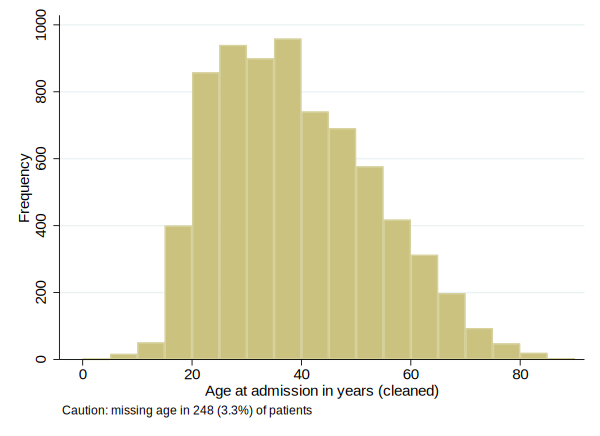

In [110]:
* Check for missing data
mdesc age
local miss=r(miss)
local pct=round(r(percent),1.1)

* Age at intake histogram
hist age, width(5) freq graphregion(color(white)) bgcolor(white) note("Caution: missing age in `miss' (`pct'%) of patients")

## Marital status

In [111]:
gen marital = .
	quietly replace marital = 1 if maritalstatus=="Single"
	quietly replace marital = 2 if maritalstatus=="Married"
	quietly replace marital = 2 if maritalstatus=="Single;Married"
	quietly replace marital = 3 if maritalstatus=="Widowed"
	quietly replace marital = 3 if maritalstatus=="Married; Widowed"
	quietly replace marital = 4 if maritalstatus=="Divorced"
	quietly replace marital = 4 if maritalstatus=="Separated"
	quietly replace marital = 9 if maritalstatus==""
	quietly replace marital = 9 if maritalstatus=="unknown"
	quietly replace marital = 9 if marital==.
		la var marital "Marital status at admission (recoded)"
			label define marlabel 1 "Single" 2 "Married" 3 "Widowed" 4 "Separated or Divorced" 9 "Unknown"
				label values marital marlabel


(7,479 missing values generated)















In [112]:
replace marital=. if marital==9
* Check for missing data
mdesc marital
tab marital, m


(185 real changes made, 185 to missing)


    Variable    |     Missing          Total     Percent Missing
----------------+-----------------------------------------------
        marital |         185          7,479           2.47
----------------+-----------------------------------------------


    Marital status at |
  admission (recoded) |      Freq.     Percent        Cum.
----------------------+-----------------------------------
               Single |      3,224       43.11       43.11
              Married |      3,380       45.19       88.30
              Widowed |        685        9.16       97.46
Separated or Divorced |          5        0.07       97.53
                    . |        185        2.47      100.00
----------------------+-----------------------------------
                Total |      7,479      100.00


## Gender

In [113]:
tab gender, m


     gender |      Freq.     Percent        Cum.
------------+-----------------------------------
            |        123        1.64        1.64
          F |      3,525       47.13       48.78
          M |      3,831       51.22      100.00
------------+-----------------------------------
      Total |      7,479      100.00


In [114]:
* Check for missing data
mdesc gender


    Variable    |     Missing          Total     Percent Missing
----------------+-----------------------------------------------
         gender |         123          7,479           1.64
----------------+-----------------------------------------------


# Bivariate Analysis



---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-> gender = 

    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         age |         77    42.06494    14.54425         16         75

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-> gender = F

    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
         age |      3,438    37.83406    13.43668          5         90

-----------------------

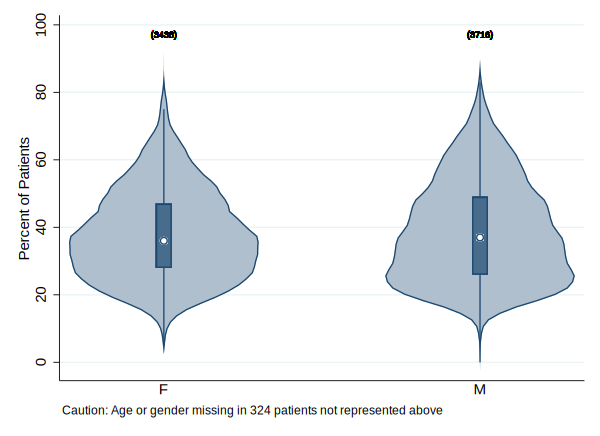

In [115]:
bysort gender: summarize age
qui distinct patientid if age==. | gender==""
local miss= r(ndistinct)
vioplot age, over(gender) ytitle("Percent of Patients") obs(alt) graphregion(color(white)) bgcolor(white) note("Caution: Age or gender missing in `miss' patients not represented above")

Intrepretation: Female patients at entry were clustered around mid-30s of age, while males tended to be a decade younger but also extending into later age.